# Imports and Style

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_manager.fontManager.addfont('/home/vvelan/DarkLim/examples/styles/Times_New_Roman.ttf')

import matplotlib as mpl
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.style.use('/home/vvelan/DarkLim/examples/styles/Style.mplstyle')

from multihist import Hist1d

from scipy.interpolate import interp1d


%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

# Functions to plot existing data

In [2]:
def extrapolate(data, mass=1e6):
    m0, s0 = data[-1]
    return np.concatenate([data,[[mass, s0*mass/m0]]], axis=0)

def minbound(curves, masses=None):
    if masses is None:
        masses = np.logspace(-3, 4, 200)
    result = np.array([np.nan]*len(masses))
    for curve in curves:
        if curve[-1][0] < masses[-1]:
            curve = extrapolate(curve, masses[-1])
        yinterp = 10**(interp1d(*(np.log10(curve).T), bounds_error=False)(np.log10(masses)))
        #yinterp = interp1d(*(curve.T), bounds_error=False)(masses)
        result = np.nanmin([result, yinterp], axis=0)
    return np.array([masses, result]).T

def load_and_plot_existing(ax, leg=True, lw=1, leg_params=None, ER_model='massless'):
    
    curves_dir = 'ExistingLimits/'
    
    if ER_model == 'massive':

        m_lim, x_lim = np.loadtxt(curves_dir + 'DAMIC_M_ER_Massive.txt').transpose()
        l1, = ax.plot(m_lim, x_lim, '--', color='#CFC0E5', lw=lw, label='DAMIC-M')
        
        m_lim, x_lim = np.loadtxt(curves_dir + 'Darkside50_ER_Massive.txt').transpose()
        l2, = ax.plot(m_lim, x_lim, '--', color='#CE977A', lw=lw, label='Darkside-50')

        m_lim, x_lim = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_ER_Massive.txt').transpose()
        l3, = ax.plot(m_lim, x_lim, '--', color='#a4dbed', lw=lw, label='SENSEI SNOLAB')
        
        m_lim, x_lim = np.loadtxt(curves_dir + 'XENON1T_S2Only_ER_Massive.txt').transpose()
        l4, = ax.plot(m_lim, x_lim, '--', color='#CA778C', lw=lw, label='XENON1T S2only')

        #m_lim, x_lim = np.loadtxt(curves_dir + 'XENON1T_S2Only_Solar_Reflected_ER_Massive.txt').transpose()
        #ax.plot(m_lim, x_lim, '--', lw=1.5, label='XENON1T S2only (Solar Refl.)')
        #m_lim, x_lim = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_Solar_Reflection_ER_Massive.txt').transpose()
        #ax.plot(m_lim, x_lim, '--', lw=1.5, label='SENSEI SNOLAB (Solar Refl.)')

        if leg:
            leg1 = ax.legend(handles=[l1, l2, l3, l4], **leg_params)
            ax.add_artist(leg1)

    elif ER_model == 'massless':
        
        m_lim, x_lim = np.loadtxt(curves_dir + 'DAMIC_M_ER_Massless.txt').transpose()
        l1, = ax.plot(m_lim, x_lim, '--', color='#CFC0E5', lw=lw, label='DAMIC-M')

        m_lim, x_lim = np.loadtxt(curves_dir + 'SENSEI_MINOS_ER_Massless.txt').transpose()
        l2, = ax.plot(m_lim, x_lim, '--', color='#CE977A', lw=lw, label='SENSEI MINOS')

        m_lim, x_lim = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_ER_Massless.txt').transpose()
        l3, = ax.plot(m_lim, x_lim, '--', color='#a4dbed', lw=lw, label='SENSEI SNOLAB')

        m_lim, x_lim = np.loadtxt(curves_dir + 'protoSENSEI_MINOS_ER_Massless.txt').transpose()
        l4, = ax.plot(m_lim, x_lim, '--', color='#CA778C', lw=lw, label='protoSENSEI')

        m_lim, x_lim = np.loadtxt(curves_dir + 'Freeze_in_ER_Massless.txt').transpose()
        l5, = ax.plot(m_lim, x_lim, '-', color='#FF9039', lw=lw*2, label='Freeze-in')

        if leg:
            leg1 = ax.legend(handles=[l1, l2, l3, l4, l5], **leg_params)
            ax.add_artist(leg1)

    else:
        
        m_lim, x_lim = np.loadtxt(curves_dir + 'CRESST_III_2019.txt').transpose()
        l1, = ax.plot(m_lim*1e3, x_lim, '--', color='#CFC0E5', lw=lw, label='CRESST-III 2019')

        m_lim, x_lim = np.loadtxt(curves_dir + 'CRESSTIII-Si-2022_cm.txt').transpose()
        l2, = ax.plot(m_lim*1e3, x_lim, '--', color='#CE977A', lw=lw, label='CRESST-III 2022')

        m_lim, x_lim = np.loadtxt(curves_dir + 'CRESST_III_2024.txt').transpose()
        l3, = ax.plot(m_lim*1e3, x_lim, '--', color='#a4dbed', lw=lw, label='CRESST-III 2024')

        if leg:
            leg1 = ax.legend(handles=[l1, l2, l3], **leg_params)
            ax.add_artist(leg1)

In [3]:
def plotexcludedmassive(ax, details=False, **kwargs):
    
    curves_dir = 'ExistingLimits/'
    
    damic = np.loadtxt(curves_dir + 'DAMIC_M_ER_Massive.txt')
    ds50 = np.loadtxt(curves_dir + 'Darkside50_ER_Massive.txt')
    sensei_snolab = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_ER_Massive.txt')
    x1t_s2o = np.loadtxt(curves_dir + 'XENON1T_S2Only_ER_Massive.txt')

    data = minbound([damic, ds50, sensei_snolab, x1t_s2o], masses=None)#data.T[0])
    kwargs.setdefault('edgecolor', None)
    kwargs.setdefault('facecolor','#000000')
    kwargs.setdefault('alpha',0.05)
    #data = extrapolate(data, 1e5)
    ax.fill_between(*(data.T), ax.get_ylim()[1], **kwargs)
    if details:
        load_and_plot_existing(ax,leg=False,lw=1,ER_model='massive')

        
def plotexcludedmassless(ax, details=False, **kwargs):
    
    curves_dir = 'ExistingLimits/'
    
    damic = np.loadtxt(curves_dir + 'DAMIC_M_ER_Massless.txt')
    sensei_minos = np.loadtxt(curves_dir + 'SENSEI_MINOS_ER_Massless.txt')
    sensei_snolab = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_ER_Massless.txt')
    proto_sensei = np.loadtxt(curves_dir + 'protoSENSEI_MINOS_ER_Massless.txt')
    freeze_in = np.loadtxt(curves_dir + 'Freeze_in_ER_Massless.txt')

    data = minbound([damic, sensei_minos, sensei_snolab, proto_sensei], masses=None)#data.T[0])
    kwargs.setdefault('edgecolor', None)
    kwargs.setdefault('facecolor','#000000')
    kwargs.setdefault('alpha',0.05)
    #data = extrapolate(data, 1e5)
    ax.fill_between(*(data.T), ax.get_ylim()[1], **kwargs)
    if details:
        load_and_plot_existing(ax,leg=False,lw=1,ER_model='massless')
        
def plotexcludedNR(ax, details=False, **kwargs):
    
    curves_dir = 'ExistingLimits/'
    
    cresst_2019 = np.loadtxt(curves_dir + 'CRESST_III_2019.txt')
    cresst_2019[:,0] *= 1e3
    cresst_2022 = np.loadtxt(curves_dir + 'CRESSTIII-Si-2022_cm.txt')
    cresst_2022[:,0] *= 1e3
    cresst_2024 = np.loadtxt(curves_dir + 'CRESST_III_2024.txt')
    cresst_2024[:,0] *= 1e3

    data = minbound([cresst_2019, cresst_2022, cresst_2024], masses=None)#data.T[0])
    kwargs.setdefault('edgecolor', None)
    kwargs.setdefault('facecolor','#000000')
    kwargs.setdefault('alpha',0.05)
    #data = extrapolate(data, 1e5)
    ax.fill_between(*(data.T), ax.get_ylim()[1], **kwargs)
    if details:
        load_and_plot_existing(ax,leg=False,lw=1,ER_model='None')

## Run 47 NR

/tmp/ipykernel_207709/2521528899.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


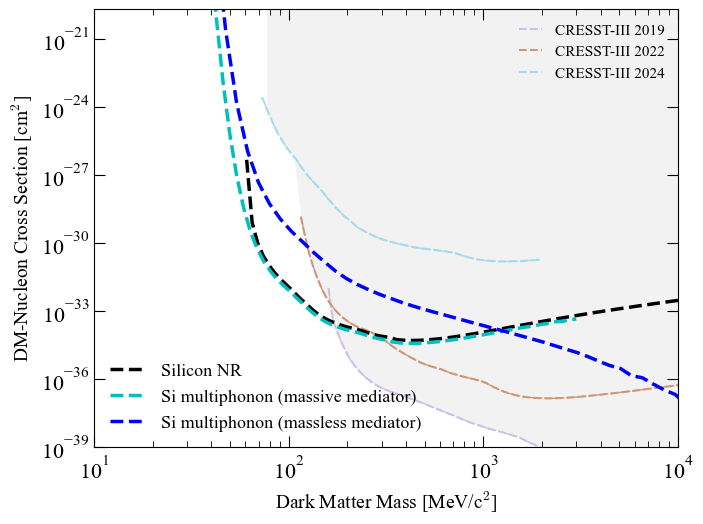

In [4]:
colors = ['blue','green','darkorange']

lss = ['-','-','-']
    
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plotexcludedNR(ax, details=True)
#leg_params = {'loc':'upper right',
#              'frameon':True,
#              'handlelength':1.5,
#              'fontsize':9,
#              'ncol':3 }
leg_params = {'loc':'upper right',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='None')

leg_hands = []

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_limit_NR/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='k', ls='--', lw=2.5, label='Silicon NR')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_limit_phonon_massive/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='c', ls='--', lw=2.5, label='Si multiphonon (massive mediator)')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_limit_phonon_massless/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='b', ls='--', lw=2.5, label='Si multiphonon (massless mediator)')
leg_hands.append(lh)

#ax.text(1e2, 5e-36, r'F$_{DM}$ = 1', fontsize=18)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-39, 2e-20)
ax.set_xlim(1e1, 1e4)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Nucleon Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower left', fontsize=13)

#plt.savefig('./pretty_plots/herald_limits_{:0.1f}g_{:0.0f}d.png'.format(mass_det*1e3,times[i]),facecolor='white',bbox_inches='tight')

## Run 47 Multiphonon

/tmp/ipykernel_207709/2521528899.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


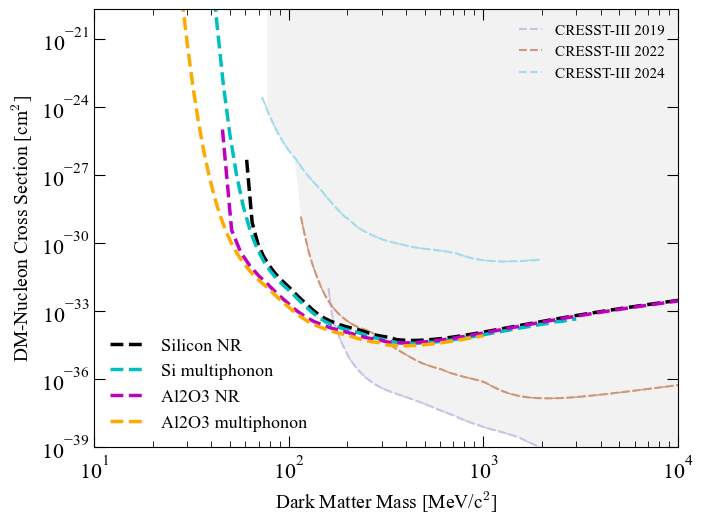

In [5]:
colors = ['blue','green','darkorange']

lss = ['-','-','-']
    
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plotexcludedNR(ax, details=True)
#leg_params = {'loc':'upper right',
#              'frameon':True,
#              'handlelength':1.5,
#              'fontsize':9,
#              'ncol':3 }
leg_params = {'loc':'upper right',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='None')

leg_hands = []

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_limit_NR/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='k', ls='--', lw=2.5, label='Silicon NR')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_limit_phonon_massive/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='c', ls='--', lw=2.5, label='Si multiphonon')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_sapphire_limit_NR/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='m', ls='--', lw=2.5, label='Al2O3 NR')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_sapphire_limit_phonon_massive/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='#ffaa00', ls='--', lw=2.5, label='Al2O3 multiphonon')
leg_hands.append(lh)

#ax.text(1e2, 5e-36, r'F$_{DM}$ = 1', fontsize=18)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-39, 2e-20)
ax.set_xlim(1e1, 1e4)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Nucleon Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower left', fontsize=13)

#plt.savefig('./pretty_plots/herald_limits_{:0.1f}g_{:0.0f}d.png'.format(mass_det*1e3,times[i]),facecolor='white',bbox_inches='tight')

## Run 47 ER

/tmp/ipykernel_207709/2521528899.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


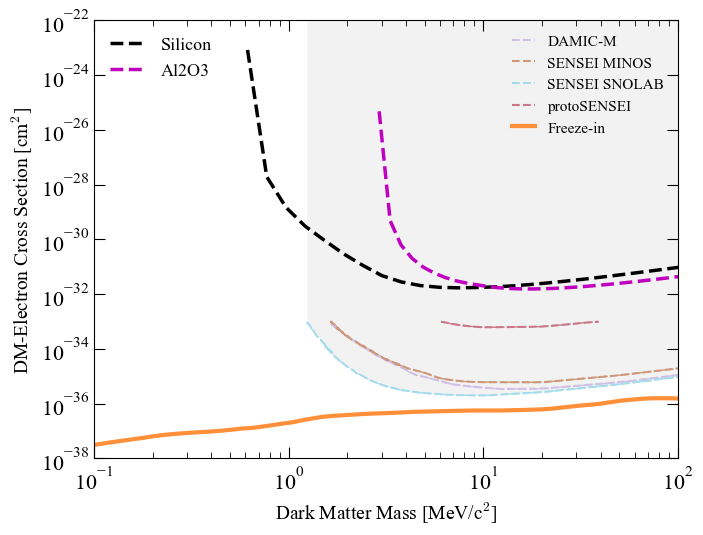

In [6]:
colors = ['blue','green','darkorange']

lss = ['-','-','-']
    
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plotexcludedmassless(ax, details=True)
#leg_params = {'loc':'upper right',
#              'frameon':True,
#              'handlelength':1.5,
#              'fontsize':9,
#              'ncol':3 }
leg_params = {'loc':'upper right',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='massless')

leg_hands = []

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_limit_electron_massless/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='k', ls='--', lw=2.5, label='Silicon')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_sapphire_limit_electron_massless/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='m', ls='--', lw=2.5, label='Al2O3')
leg_hands.append(lh)

#ax.text(1e2, 5e-36, r'F$_{DM}$ = 1', fontsize=18)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-38, 1e-22)
ax.set_xlim(1e-1, 1e2)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Electron Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='upper left', fontsize=13)

#plt.savefig('./pretty_plots/herald_limits_{:0.1f}g_{:0.0f}d.png'.format(mass_det*1e3,times[i]),facecolor='white',bbox_inches='tight')

/tmp/ipykernel_207709/2521528899.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


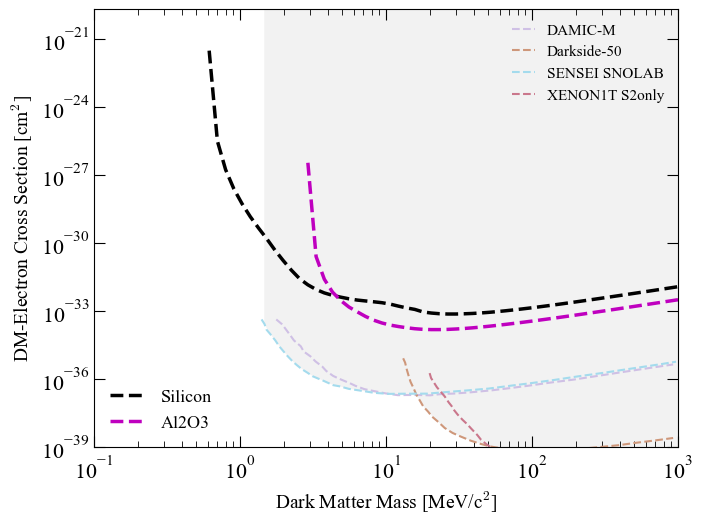

In [7]:
colors = ['blue','green','darkorange']

lss = ['-','-','-']
    
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plotexcludedmassive(ax, details=False)
#leg_params = {'loc':'upper right',
#              'frameon':True,
#              'handlelength':1.5,
#              'fontsize':9,
#              'ncol':3 }
leg_params = {'loc':'upper right',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='massive')

leg_hands = []

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_limit_electron_massive/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='k', ls='--', lw=2.5, label='Silicon')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('Run47_Results/Run47_sapphire_limit_electron_massive/limit.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='m', ls='--', lw=2.5, label='Al2O3')
leg_hands.append(lh)

#ax.text(1e2, 5e-36, r'F$_{DM}$ = 1', fontsize=18)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-39, 2e-20)
ax.set_xlim(1e-1, 1e3)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Electron Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower left', fontsize=13)

#plt.savefig('./pretty_plots/herald_limits_{:0.1f}g_{:0.0f}d.png'.format(mass_det*1e3,times[i]),facecolor='white',bbox_inches='tight')

## Projections: Sapphire, Exponential LEE

/tmp/ipykernel_207709/2521528899.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


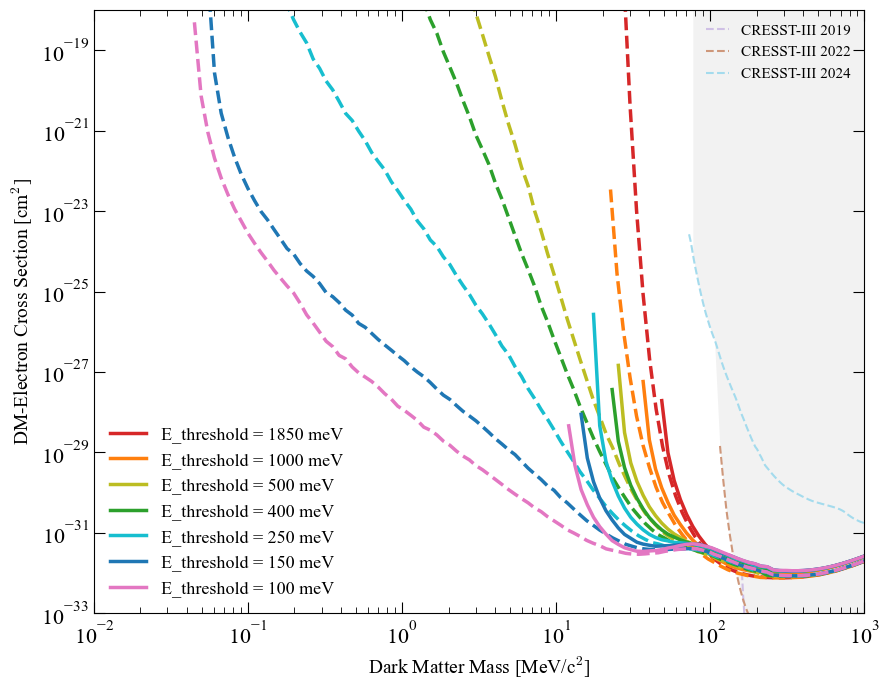

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))

plotexcludedNR(ax, details=False)
leg_params = {'loc':'upper right',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='None')

leg_hands = []

for (baseline_meV, color) in \
    zip([370, 200, 100, 80, 50, 30, 20],
        ['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b']):
        
    m_limit, x_limit = np.loadtxt(f'projections/sapphire_1sec_{baseline_meV}meV_NR/limit.txt').transpose()
    lh, = ax.plot(m_limit*1e3, x_limit, '-', color=color, lw=2.5, label=f'E_threshold = {baseline_meV*5} meV')
    leg_hands.append(lh)

    m_limit, x_limit = np.loadtxt(f'projections/sapphire_1sec_{baseline_meV}meV_phonon_massive/limit.txt').transpose()
    ax.plot(m_limit*1e3, x_limit, '--', color=color, lw=2.5)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-33, 1e-18)
ax.set_xlim(1e-2, 1e3)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Electron Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower left', fontsize=13)

fig.tight_layout()
fig.show()


## Projections: Sapphire, Power-Law LEE

/tmp/ipykernel_207709/2521528899.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


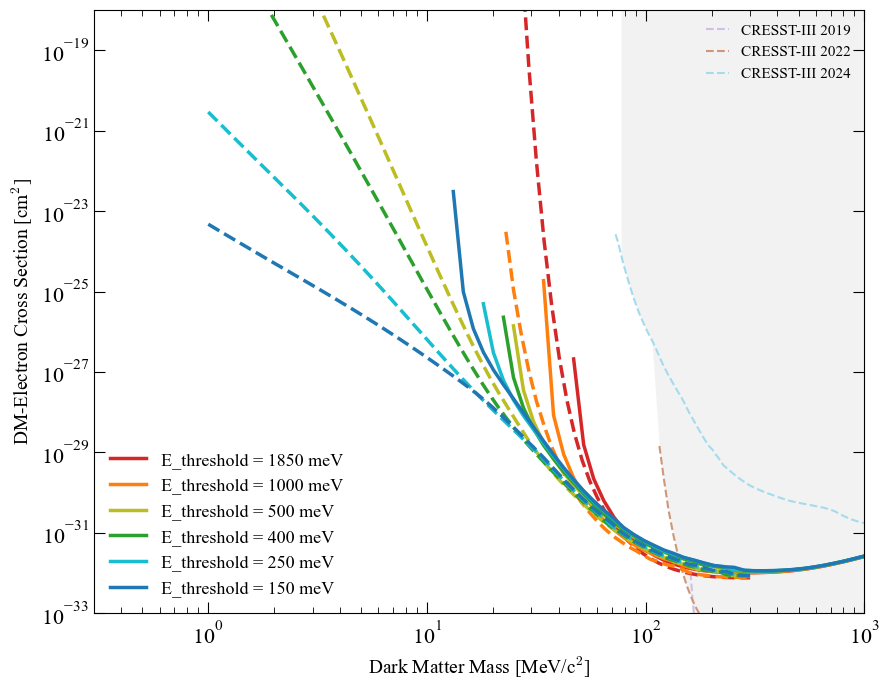

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))

plotexcludedNR(ax, details=False)
leg_params = {'loc':'upper right',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='None')

leg_hands = []

for (baseline_meV, color) in \
    zip([370, 200, 100, 80, 50, 30],
        ['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b']):
        
    m_limit, x_limit = np.loadtxt(f'projections/sapphire_power_bkgd_1sec_{baseline_meV}meV_NR/limit.txt').transpose()
    lh, = ax.plot(m_limit*1e3, x_limit, '-', color=color, lw=2.5, label=f'E_threshold = {baseline_meV*5} meV')
    leg_hands.append(lh)

    m_limit, x_limit = np.loadtxt(f'projections/sapphire_power_bkgd_1sec_{baseline_meV}meV_phonon_massive/limit.txt').transpose()
    ax.plot(m_limit*1e3, x_limit, '--', color=color, lw=2.5)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-33, 1e-18)
ax.set_xlim(3e-1, 1e3)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Electron Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower left', fontsize=13)

fig.tight_layout()
fig.show()


## Projections: Silicon

/tmp/ipykernel_207709/2521528899.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


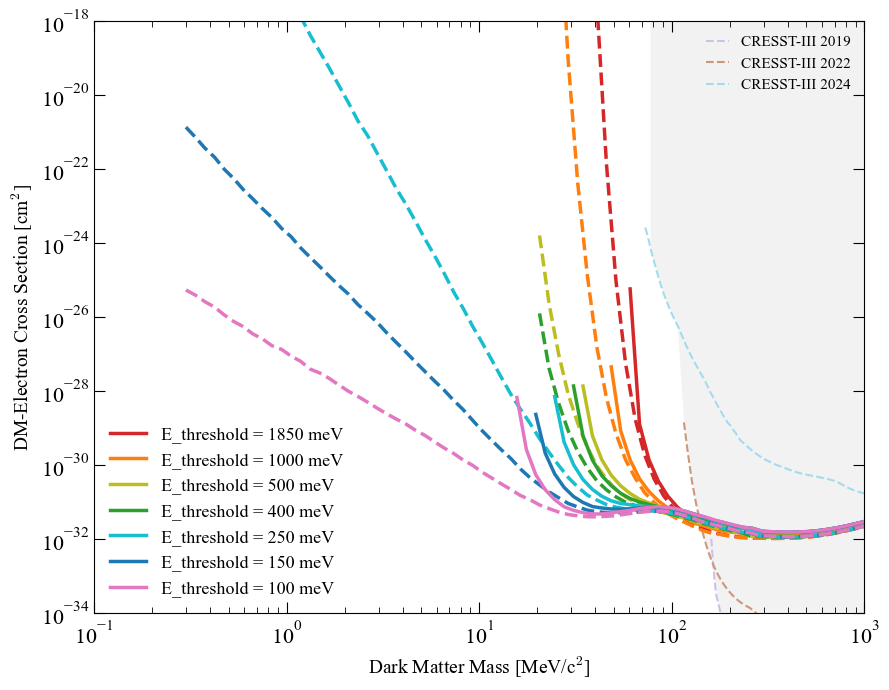

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))

plotexcludedNR(ax, details=False)
leg_params = {'loc':'upper right',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='None')

leg_hands = []



for (baseline_meV, color) in \
    zip([370, 200, 100, 80, 50, 30, 20],
        ['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b']):
        
    m_limit, x_limit = np.loadtxt(f'projections/silicon_1sec_{baseline_meV}meV_NR/limit.txt').transpose()
    lh, = plt.plot(m_limit*1e3, x_limit, '-', color=color, lw=2.5, label=f'E_threshold = {baseline_meV*5} meV')
    leg_hands.append(lh)

    m_limit, x_limit = np.loadtxt(f'projections/silicon_1sec_{baseline_meV}meV_phonon_massive/limit.txt').transpose()
    ax.plot(m_limit*1e3, x_limit, '--', color=color, lw=2.5)


ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-34, 1e-18)
ax.set_xlim(1e-1, 1e3)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Electron Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower left', fontsize=13)

fig.tight_layout()
fig.show()


## Projections: Silicon and Sapphire, compared

/tmp/ipykernel_207709/2521528899.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)
/tmp/ipykernel_207709/1697149380.py:38: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower left', fontsize=13)


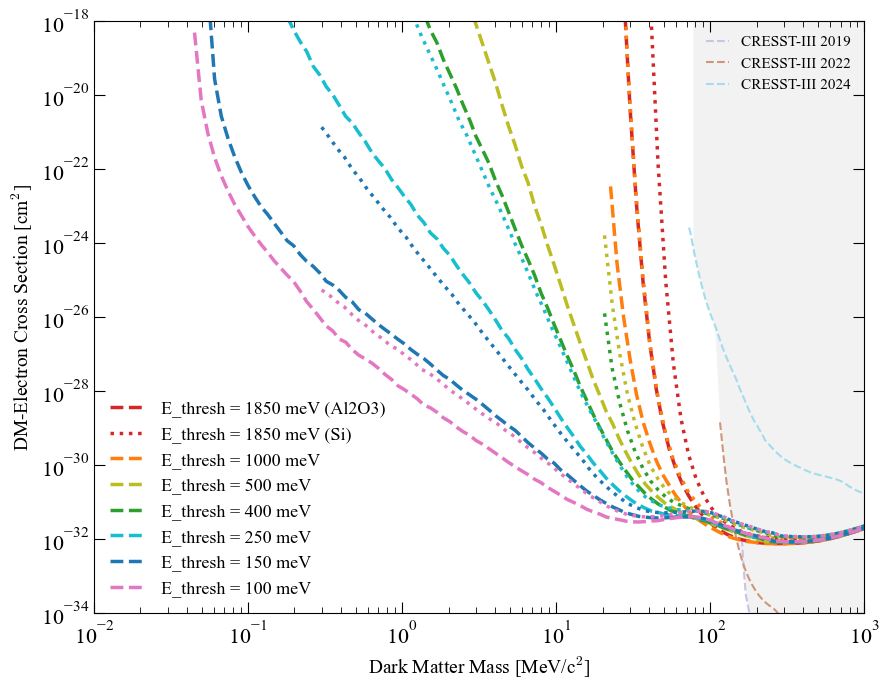

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))

plotexcludedNR(ax, details=False)
leg_params = {'loc':'upper right',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='None')

leg_hands = []

for i, (baseline_meV, color) in \
    enumerate(zip([370, 200, 100, 80, 50, 30, 20],
        ['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b'])):
        
    m_limit, x_limit = np.loadtxt(f'projections/sapphire_1sec_{baseline_meV}meV_phonon_massive/limit.txt').transpose()
    lh, = plt.plot(m_limit*1e3, x_limit, '--', color=color, lw=2.5, label=f'E_thresh = {5*baseline_meV} meV' + (' (Al2O3)' if i == 0 else ''))
    leg_hands.append(lh)

    m_limit, x_limit = np.loadtxt(f'projections/silicon_1sec_{baseline_meV}meV_phonon_massive/limit.txt').transpose()
    lh, = plt.plot(m_limit*1e3, x_limit, ':', color=color, lw=2.5, label=f'E_thresh = {5*baseline_meV} meV (Si)' if i == 0 else '')
    leg_hands.append(lh)


ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-34, 1e-18)
ax.set_xlim(1e-2, 1e3)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Electron Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower left', fontsize=13)

fig.tight_layout()
fig.show()
